

# Monthly Rainfall Variation (% deviation from annual averages 2000 - Sep 2017)
### Creates a plot analyzing rainfall variation in select cities
***Created on Fri Oct 20, 2017***   
***Author: Reynaldo Vazquez***

The data used below comes from the U.S. National Oceanic and 
Atmospheric Administration's (NOAA) Daily Summaries. It was retrieved on
October 24, 2017 from [here](https://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND), applying the following search parameters:  

* Date Range: 01-01-2000 - 09-30-2017  
* Locations (City): Ann Arbor, MI., Santa Barbara, CA., Montgomery, AL., McAllen, TX.  
* Data Set: Precipitation (all subsets).  

This program uses `.csv` files from online sources, no need to download separately. 

### Import required modules

In [21]:
%matplotlib notebook 
# comment or adjust line above if running as .py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

### List of cities to be analyzed

In [ ]:
cities = ['ann_arbor', 'santa_barbara', 'montgomery', 'mcallen']

### Data processing function
Notes: 
> Snowfall to rain. 1 unit of snowfall = 0.1 units of rainfall  
> Rain equivalent = rainfall + converted snowfall.  
> Use monthly means b/c reporting stations vary over time, thus sum is not appropriate.   
> No need to convert to month total rainfall, nor specify units, since this analysis addresses variation only.   
    

In [ ]:
def deviations(df):
  # Will process the raw files into the data required for the plot.
  #
  #   Args. df: A dataframe containing the daily rainfall and snowfall 
  #             data for one geographical location (i.e. city here).
  #   Output: Monthly rainfall averages as percentage of the year 
  #             monthly average
  #
  df = (df.assign(DATE = (pd.to_datetime(df.DATE)).values))
  df = (df.assign(SNOWeq = (df['SNOW']*(0.1)).values)) # convert snow to rain 
  # equiv. 1 inch of rain = 10 inches of snow
  # create variable 'rain_equiv' by summing rain plus snow-rain equivalent. 
  rain_equiv = df[['SNOWeq', 'PRCP']].sum(axis = 1) # b/c "+" returns excessive NaN
  rain_equiv.loc[df['SNOW'].isnull() & df['PRCP'].isnull()]=np.nan # b/c NaNs were treated as 0s
  df = (df.assign(rain_equiv = rain_equiv.values))
  df = df[['DATE', 'rain_equiv']]
  df.index = df['DATE']
  month_means = df.groupby(pd.TimeGrouper(freq='M')).mean() # use mean instead of sum b/c of 
  grouper = pd.TimeGrouper("A")                             # changing stations over time
  month_means['deviation'] = month_means.groupby(grouper).transform(lambda x:
    (x-x.mean())/x.mean()) # use percentage variation from the annual average to make comparable
  month_means['month'] = [i.month for i in month_means.index]
  mo_no = month_means['month'].unique()
  to_plot = [[month_means.deviation[month_means.month == i]] for i in mo_no]
  return to_plot

### Load data from online sources and process using function `deviations( )`

In [16]:
# Create lists of month names and city names for proper plot labelling
mo_name = [calendar.month_abbr[i] for i in range(1,13)]
city_title = ['Ann Arbor, MI', 'Santa Barbara, CA', 'Montgomery, AL', 
              'McAllen, TX']

In [17]:
url_dir = 'https://raw.githubusercontent.com/reyvaz/Rainfall_Variation/master/'
dict_cities = dict()
for city in cities: 
  url = url_dir + city + '.csv'
  df = pd.read_csv(url)
  dict_cities[city] = deviations(df)

### Function with plotting instructions


In [18]:
def fill_fig(i):
  # Creates a boxplot for the city specified by the index i.
  #
  #   Args. i: index of the city in the cities list
  #   Output: A boxplot for the position corresponding to i in the figure
  #
  city = cities[i]
  bp = axs[i].boxplot(dict_cities[city], sym = '', whis = 0, 
          patch_artist = True)#, showmeans=True, meanline = True)
  axs[i].tick_params(length=2, width=0.5, colors='0.55',labelsize = 5)
  axs[i].set_xticklabels(mo_name)
  axs[i].text(6.5, 2.6, city_title[i], fontsize=6, color = '0.5', ha = 'center')
  for spine in axs[i].spines.values():
    spine.set_edgecolor('#e6e6e6')
  axs[i].spines['top'].set_visible(False)
  axs[i].spines['right'].set_visible(False)
  #axs[i].axhline(y=0, linewidth=0.5, color = '0.6')
  for box in bp['boxes']:
    box.set(color='0.7', linewidth=0.5)
    box.set(facecolor = '0.85' )
  for median in bp['medians']:
    median.set(color='#cc00cc', linewidth=0.7)
  for cap in bp['caps']:
    cap.set(color='0.5', linewidth=0)

### Initialize, process, and print figure

<IPython.core.display.Javascript object>


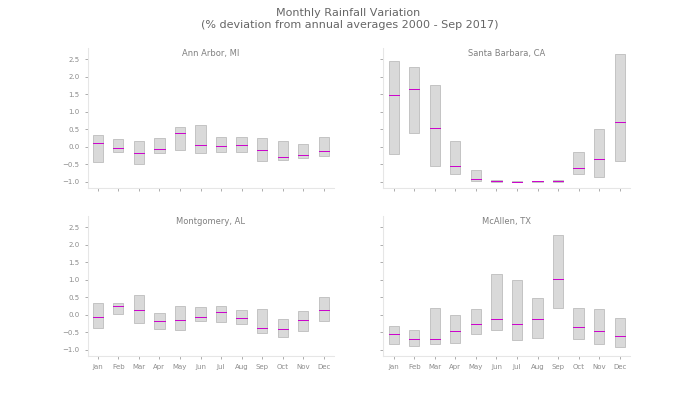

In [19]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharey = True, sharex = True,
     squeeze = False)
axs = [ax1,ax2,ax3,ax4]
fig.set_size_inches(7, 4)
fig.suptitle("Monthly Rainfall Variation \n(% deviation from annual averages 2000 - Sep 2017)",
             fontsize=8, color = '0.4')    
for i in range(0,len(axs)):
  fill_fig(i)